CesiCDP Project - Deliverable 1
===

### 1. Context

CesiCDP has been tasked with developing an innovative solution in response to ADEME's call for promoting new mobility solutions. The focus of this project is on optimizing delivery routes across a road network, with the goal of minimizing travel times while considering real-world challenges such as varying traffic conditions. This problem is framed within the context of the Vehicle Routing Problem (VRP), which is a central issue in logistics and transportation optimization.

VRP can be seen as an extension of the Traveling Salesman Problem (TSP), a classic optimization problem. The purpose of this deliverable is to formally model the VRP, analyze its complexity, and explore its relationship with the TSP, a problem known to be NP-complete. By understanding the underlying theoretical properties of the VRP, we can lay the groundwork for developing effective algorithmic solutions.

### 2.Traveling Salesman Problem (TSP)

The Traveling Salesman Problem (TSP) is a classical combinatorial optimization problem. Given a set of cities and the pairwise distances between them, the goal is to find the shortest possible route that visits each city exactly once and returns to the starting city.

The TSP can be modeled using a graph G = (V, E) , where :
- V is the set of cities (nodes)
- E is the set of edges connecting the cities


##### Example :
Let’s consider a TSP instance with 10 cities, represented by the following distance matrix:

\begin{pmatrix}
0 & 3 & 6 & 5 & 7 & 2 & 6 & 8 & 5 & 4 \\
3 & 0 & 4 & 7 & 6 & 5 & 8 & 9 & 7 & 6 \\
6 & 4 & 0 & 3 & 4 & 6 & 9 & 11 & 8 & 7 \\
5 & 7 & 3 & 0 & 3 & 7 & 10 & 12 & 9 & 8 \\
7 & 6 & 4 & 3 & 0 & 8 & 11 & 13 & 10 & 9 \\
2 & 5 & 6 & 7 & 8 & 0 & 5 & 6 & 3 & 2 \\
6 & 8 & 9 & 10 & 11 & 5 & 0 & 3 & 2 & 4 \\
8 & 9 & 11 & 12 & 13 & 6 & 3 & 0 & 4 & 5 \\
5 & 7 & 8 & 9 & 10 & 3 & 2 & 4 & 0 & 1 \\
4 & 6 & 7 & 8 & 9 & 2 & 4 & 5 & 1 & 0 \\
\end{pmatrix}


For a specific tour [ 0 -> 2 -> 4 -> 3 -> 1 -> 5 -> 6 -> 8 -> 7 -> 9 -> 0 ], the total cost can be calculated as : 

D[total] =D[0][2] + D[2][4] + D[4][3] + D[3][1] + D[1][5] + D[5][6] + D[6][8] + D[8][7] + D[7][9] + D[9][0]

= 6 + 4 + 3 + 7 + 5 + 5 + 2 + 4 + 5 + 4 
= 45
​
 





In [2]:
import numpy as np

# Define the distance matrix based on the earlier example
D = np.array([
    [0, 3, 6, 5, 7, 2, 6, 8, 5, 4],
    [3, 0, 4, 7, 6, 5, 8, 9, 7, 6],
    [6, 4, 0, 3, 4, 6, 9, 11, 8, 7],
    [5, 7, 3, 0, 3, 7, 10, 12, 9, 8],
    [7, 6, 4, 3, 0, 8, 11, 13, 10, 9],
    [2, 5, 6, 7, 8, 0, 5, 6, 3, 2],
    [6, 8, 9, 10, 11, 5, 0, 3, 2, 4],
    [8, 9, 11, 12, 13, 6, 3, 0, 4, 5],
    [5, 7, 8, 9, 10, 3, 2, 4, 0, 1],
    [4, 6, 7, 8, 9, 2, 4, 5, 1, 0]
])

# Define the route for TSP
tsp_route = [0, 2, 4, 3, 1, 5, 6, 8, 7, 9, 0]

# Calculate the total cost of the route
def calculate_tsp_cost(route, D):
    cost = 0
    for i in range(len(route) - 1):
        cost += D[route[i], route[i+1]]
    return cost

tsp_cost = calculate_tsp_cost(tsp_route, D)
print("Total travel cost for TSP:", tsp_cost)


Total travel cost for TSP: 45


### TSP Graph 
The graph shows a single vehicle traveling through all the cities, starting and ending at the depot (City 0)
TSP is well-suited for smaller instances or cases where only one vehicle is involved.

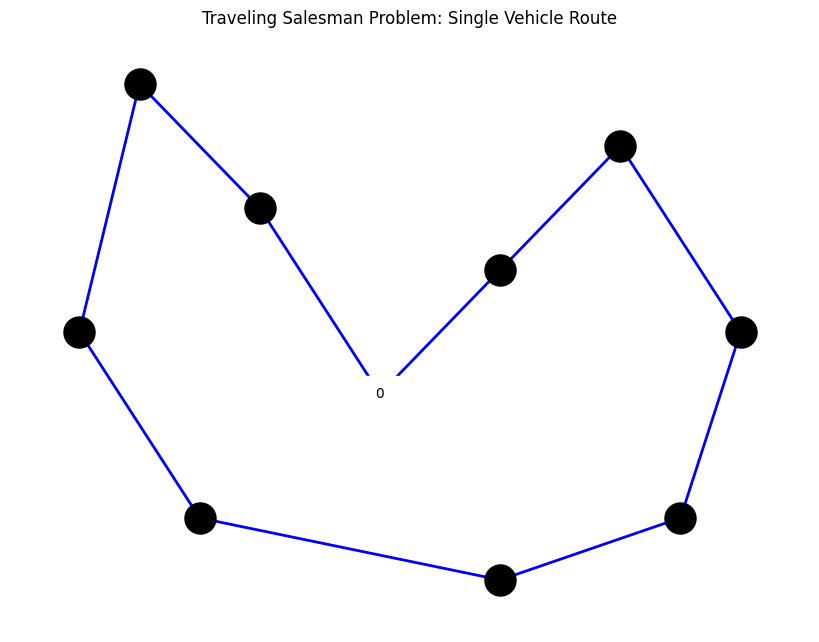

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G_tsp = nx.Graph()

# Define city coordinates (x, y) for TSP
cities = {0: (5, 5), 1: (3, 8), 2: (1, 10), 3: (0, 6), 4: (2, 3),
          5: (7, 7), 6: (9, 9), 7: (11, 6), 8: (10, 3), 9: (7, 2)}
G_tsp.add_nodes_from(cities.keys())

# Define the single route for TSP (one vehicle visits all cities and returns)
edges_tsp = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 9), (9, 8), (8, 7), (7, 6), (6, 5), (5, 0)]

# Add the edges to the graph
G_tsp.add_edges_from(edges_tsp)

# Position of cities
pos = cities

# Plotting the TSP graph with one route
plt.figure(figsize=(8, 6))

# Draw nodes (cities)
nx.draw(G_tsp, pos, with_labels=True, node_color='black', node_size=500, font_size=10)

# Draw the TSP route (a single vehicle visiting all cities)
nx.draw_networkx_edges(G_tsp, pos, edgelist=edges_tsp, edge_color='blue', width=2)

# Highlight the depot (starting point) with a square marker
nx.draw_networkx_nodes(G_tsp, pos, nodelist=[0], node_shape='s', node_color='white', node_size=700)

# Title and display
plt.title("Traveling Salesman Problem: Single Vehicle Route")
plt.show()


#### 3. Vehicle Routing Problem (VRP)

The Vehicle Routing Problem (VRP) extends the TSP by introducing multiple vehicles (or trucks), each with a set capacity, and the objective is to deliver goods to various locations. The aim is to minimize the total time or distance traveled while ensuring that each delivery point is visited exactly once, and each vehicle starts and ends at a central depot.

The VRP is also modeled using a graph G = (V, E) , where :
- V represents the set of cities including the depot 
- E represents the edges between the cities
- D<sub>ij</sub> represents the travel distance between city i and j 

In addition to the constraints of TSP? we add : 
- k : Number of truck
- C : Capacity of each truck
- q<sub>i</sub> : Quantity to be delivered to city i, which must not exceed the capacity of any truck.

##### Example :
Consider the same set of cities as in the TSP example, but now we introduce two trucks starting from the depot (city 0). Each truck has a capacity of 4, and each city requires the delivery of 2 unit of goods.

The trucks follow these routes:
- Truck 1 : [0 -> 1 -> 2 -> 3 -> 0]
- Truck 2 : [0 -> 4 -> 9 -> 8 -> 0]
- Truck 3 : [0 -> 5 -> 6 -> 7 -> 0]

We can calculate the total distance traveled by both trucks:
- Truck 1 : D[0][1] + D[1][2] + D[2][3] + D[3][0] = 15
- Truck 2 : D[0][4] + D[4][9] + D[9][8] + D[8][0] = 22
- Truck 3 : D[0][5] + D[5][6] + D[6][7] + D[7][0] = 18

Total VRP cost : 15 + 22 + 18 = 55

In [51]:
# Define the routes for VRP
routes = [
    [0, 1, 2, 3, 0],  # Route 1
    [0, 4, 9, 8, 0],  # Route 2
    [0, 5, 6, 7, 0],  # Route 3
]

# Initialize total cost
total_cost = 0

# Calculate and print the cost for each route individually
for route in routes:
    route_cost = sum(D[route[i], route[i + 1]] for i in range(len(route) - 1))
    print(f"Cost for route {route}: {route_cost}")
    total_cost += route_cost  # Add the route cost to the total cost

# Print the total travel cost for VRP
print("Total travel cost for VRP:", total_cost)


Cost for route [0, 1, 2, 3, 0]: 15
Cost for route [0, 4, 9, 8, 0]: 22
Cost for route [0, 5, 6, 7, 0]: 18
Total travel cost for VRP: 55


### VRP Graph
The graph clearly illustrates the three different routes taken by three trucks, each starting and ending at the same depot (City 0).
VRP is better for larger instances with multiple vehicles. Each truck handles a subset of cities, making it more practical for logistics operations.

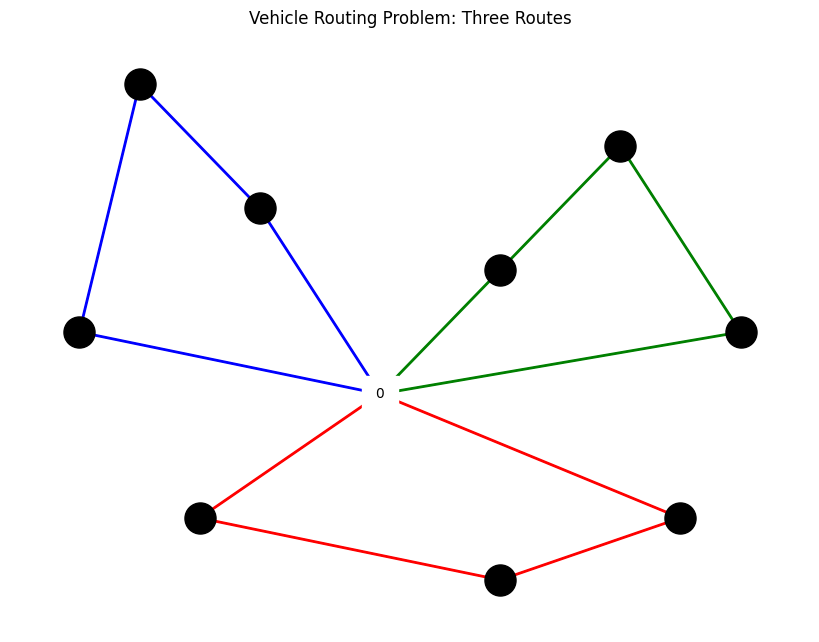

In [52]:
# Create the graph
G_vrp = nx.Graph()

# Define the routes for the VRP (3 routes)
route1 = [(0, 1), (1, 2), (2, 3), (3, 0)]  # Blue route
route2 = [(0, 4), (4, 9), (9, 8), (8, 0)]  # Red route
route3 = [(0, 5), (5, 6), (6, 7), (7, 0)]  # Green route

# Add the edges to the graph
G_vrp.add_edges_from(route1 + route2 + route3)

# Position of cities
pos = cities

# Plotting the VRP graph with multiple routes
plt.figure(figsize=(8, 6))

# Draw nodes (cities)
nx.draw(G_vrp, pos, with_labels=True, node_color='black', node_size=500, font_size=10)

# Draw the three routes with different colors
nx.draw_networkx_edges(G_vrp, pos, edgelist=route1, edge_color='blue', width=2)  # Route 1
nx.draw_networkx_edges(G_vrp, pos, edgelist=route2, edge_color='red', width=2)   # Route 2
nx.draw_networkx_edges(G_vrp, pos, edgelist=route3, edge_color='green', width=2) # Route 3

# Highlight the depot (starting point) with a square marker
nx.draw_networkx_nodes(G_vrp, pos, nodelist=[0], node_shape='s', node_color='white', node_size=700)

# Title and display
plt.title("Vehicle Routing Problem: Three Routes")
plt.show()


### 4. Theoretical Complexity Analysis

Both VRP and TSP belong to the class of problems known as NP (Nondeterministic Polynomial time). A problem is in NP if a solution can be verified in polynomial time, even if finding that solution might not be achievable in polynomial time. VRP is in NP because given a candidate solution (set of vehicle routes), we can easily verify whether the solution meets all the constraints and calculate the total travel time in polynomial time.



We can reduce VRP to TSP in certain simplified cases. The basic idea is to treat all vehicles as a single "super vehicle" that must visit all cities (delivery points). This transforms the VRP into a TSP-like problem. However, this reduction removes important constraints that distinguish VRP, such as the need to allocate deliveries among multiple vehicles and minimize the time taken by the last truck to return.

For example, in the Capacitated VRP, where vehicles have a limited capacity, a solution to TSP would ignore the capacity limits, resulting in an invalid solution for the VRP. Therefore, while there is a conceptual reduction from VRP to TSP, the complexities of VRP require additional problem-solving techniques.

### 5. Comparison of TSP and VRP

#### Problem Complexity
Both TSP and VRP belong to the class of NP-hard problems, meaning that the time required to find the optimal solution increases exponentially with the number of cities (for TSP) or cities and trucks (for VRP). However, VRP introduces additional complexities that make it more suitable for real-world logistics applications. In TSP, only one route is required, whereas VRP must consider multiple trucks, capacity constraints, and possibly time windows for deliveries.

TSP focuses on finding a single tour that visits all cities exactly once.
VRP extends this by introducing multiple vehicles, making it more applicable to situations where a fleet of trucks must deliver goods.
#### Cost Comparison
In our example, the TSP solution had a total travel cost of 45, while the VRP solution with two trucks had a total cost of 55. Although VRP’s cost is higher, it allows multiple trucks to operate in parallel, which can be more practical in real-world scenarios where time is more critical than total distance.

#### Python Code Comparison
The Python code for both problems is similar in structure, but VRP introduces an extra level of complexity by requiring us to calculate the routes for multiple trucks. This illustrates how VRP generalizes TSP by adding more dimensions to the problem, such as fleet size and delivery constraints.